In [1]:
graphics_toolkit('gnuplot')

In [2]:
[xx, yy] = textread ('data.txt', "%f;%f");
size(xx)
size(yy)

ans =

   398     1



ans =

   398     1



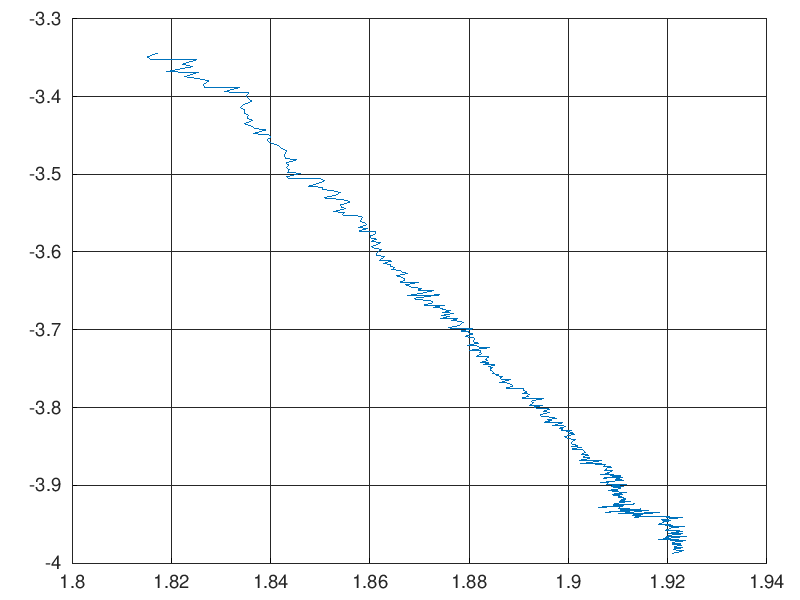

In [3]:
figure(1, 'position',[0, 0, 800, 600]);
grid on
hold on
plot(xx, yy)
# plot([2000,2000], [0, 300])

In [4]:
% pkg install interval

## Установить пути к функциям построения интервальной регрессии
addpath(genpath('./m'))

Подробнее рассмотрим синий график:
отьерём первые 10 значений

n = 5


start_i = 1


step = 99


end_i = 396


inds =

     1   100   199   298   397



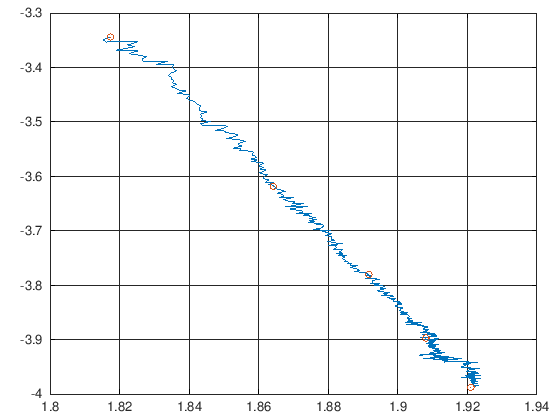

In [5]:
n = 5
start_i = 1
step = 99
end_i = step * (n - 1)
inds = [start_i:step:end_i + 1]

figure
plot(xx(start_i:end_i), yy(start_i:end_i), "-")
hold on
grid on
plot(xx(inds), yy(inds), "o")


In [6]:
## Определить задачу построения интервальной регрессии 
##     y = X * beta = beta1 + beta2 * x 
## с ограничением beta2 >= 0

x = xx(inds)';        # количество затраченного топлива
y = yy(inds)';        # объем произведенного пара

epsilon = zeros(1, n) + 0.05;  # верхняя граница ошибки для y_i

display(x)
display(y)
display(epsilon)

x = reshape(x, size(x)(2), size(x)(1));
y = reshape(y, size(y)(2), size(y)(1));
epsilon = reshape(epsilon, size(epsilon)(2), size(epsilon)(1));

X = [ x.^0 x ]                               # матрица значений переменных при beta1 и beta2
lb = [-inf -inf];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, epsilon, lb);    # создание переменной, содержащей описание задачи 
                                              #               построения интервальной регрессии


x =

   1.8173   1.8642   1.8917   1.9081   1.9210



y =

  -3.3441  -3.6185  -3.7803  -3.8970  -3.9875



epsilon =

    0.050000    0.050000    0.050000    0.050000    0.050000



X =

   1.0000   1.8173
   1.0000   1.8642
   1.0000   1.8917
   1.0000   1.9081
   1.0000   1.9210



In [7]:
display(x)
display(y)
display(epsilon)

x =

   1.8173
   1.8642
   1.8917
   1.9081
   1.9210



y =

  -3.3441
  -3.6185
  -3.7803
  -3.8970
  -3.9875



epsilon =

   0.050000
   0.050000
   0.050000
   0.050000
   0.050000



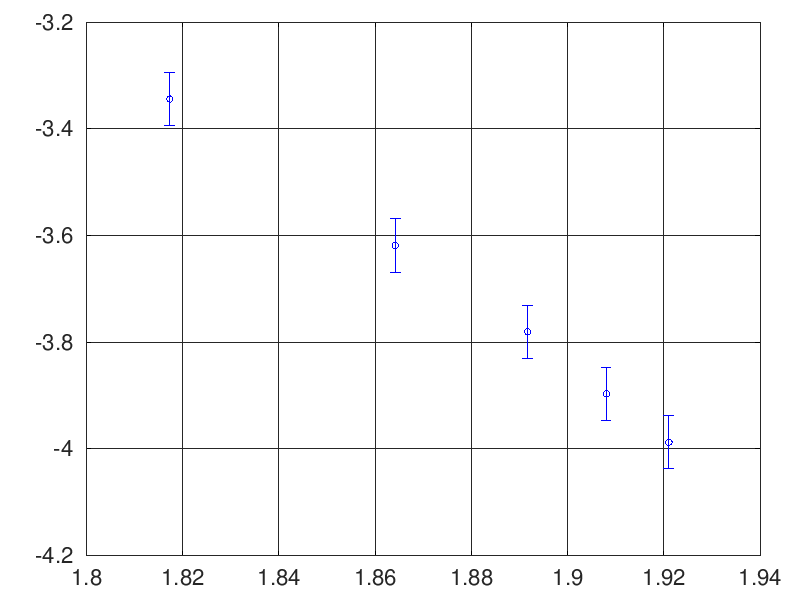

In [8]:
## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);   
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
grid on
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');

Можно добавить график обычной МНК регрессию

b_lsm =

   7.8565  -6.1591



ans = -43.638


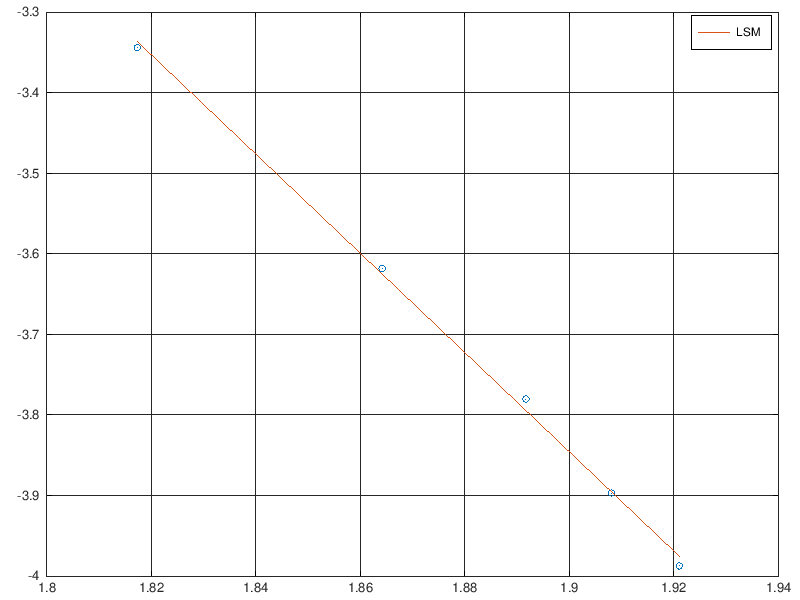

In [28]:
## Линейная регрессия МНК

b_lsm = (X \ y)'  
MNK_line = [b_lsm(1) + b_lsm(2) * min(x), b_lsm(1) + b_lsm(2) * max(x)];


figure('position',[0, 0, 800, 600]);

plot(x, y, "o")
hold on
grid on
plot([min(x),  max(x)], MNK_line)
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 7)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');
legend("", "LSM  ")


irp_temp =

  scalar structure containing the fields:

    X =

       1.0000   1.8173
       1.0000   1.8642
       1.0000   1.8917
       1.0000   1.9081
       1.0000   1.9210

    y =

      -3.3441
      -3.6185
      -3.7803
      -3.8970
      -3.9875

    epsilon =

       0.050000
       0.050000
       0.050000
       0.050000
       0.050000

    lb =

      -Inf  -Inf

    ub =

       Inf   Inf

    C = [](0x0)
    d = [](0x0)
    ctype = [](0x0)



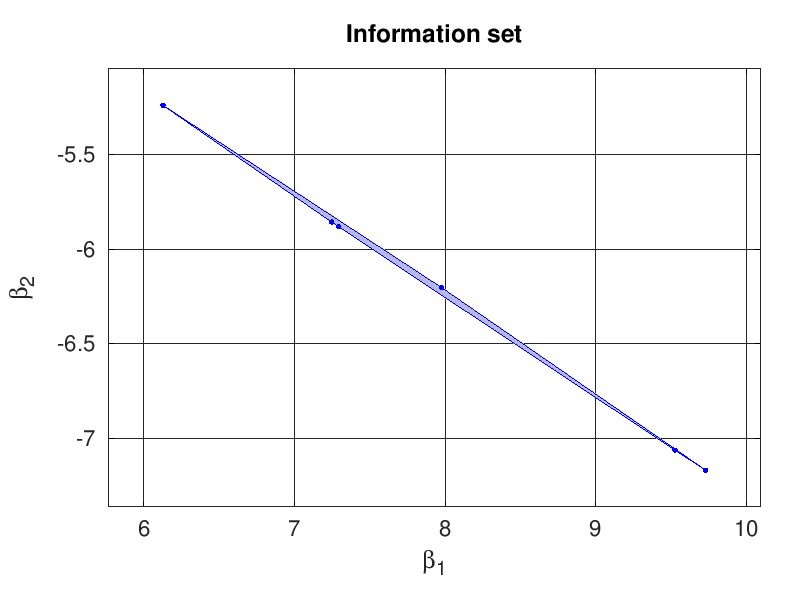

In [10]:
## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
irp_temp
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

In [11]:
#ЗЛП
eps = epsilon
m = size(x)(1)
C = zeros(1, m + 2);
for i = 1:m
C(i) = 1;
end
display(C)
A = zeros(2*m, m+2);

for i = 1:m
A(2 * i - 1, i) = eps(i);
A(2 * i, i) = eps(i);

A(2 * i - 1, m + 1) = 1;
A(2 * i, m + 1) = -1;

A(2 * i - 1, m + 2) = x(i);
A(2 * i, m + 2) = -x(i);

end

display(A)

B = zeros(1, 2*m);
for i = 1:m
B(2 * i - 1) = y(i);
B(2 * i) = -y(i);
end

display(B)

lb = zeros(1, m+2);
for i = 1:m
lb(i) = 1;
end

lb(m+2) = -inf;

display(lb)

ctype = "";
for i = 1:2 * m
ctype(i) = 'L';
end

display(ctype)

vartype = "";
for i = 1:m + 2
vartype(i) = 'C';
end

display(vartype)

sense = 1

eps =

   0.050000
   0.050000
   0.050000
   0.050000
   0.050000



m = 5


C =

   1   1   1   1   1   0   0



A =

   0.0500        0        0        0        0   1.0000   1.8173
   0.0500        0        0        0        0  -1.0000  -1.8173
        0   0.0500        0        0        0   1.0000   1.8642
        0   0.0500        0        0        0  -1.0000  -1.8642
        0        0   0.0500        0        0   1.0000   1.8917
        0        0   0.0500        0        0  -1.0000  -1.8917
        0        0        0   0.0500        0   1.0000   1.9081
        0        0        0   0.0500        0  -1.0000  -1.9081
        0        0        0        0   0.0500   1.0000   1.9210
        0        0        0        0   0.0500  -1.0000  -1.9210



B =

 Columns 1 through 8:

  -3.3441   3.3441  -3.6185   3.6185  -3.7803   3.7803  -3.8970   3.8970

 Columns 9 and 10:

  -3.9875   3.9875



lb =

     1     1     1     1     1     0  -Inf



ctype = LLLLLLLLLL


vartype = CCCCCCC


sense = 1


In [12]:
w = glpk(C,A,B,lb,[],ctype,vartype,sense)

w =

   1.0000
   1.0000
   1.0000
   1.0000
   1.0000
   6.1272
  -5.2392



scale = 1


x =

   1.8173
   1.8642
   1.8917
   1.9081
   1.9210



y =

  -3.3441
  -3.6185
  -3.7803
  -3.8970
  -3.9875



eps =

   0.050000
   0.050000
   0.050000
   0.050000
   0.050000



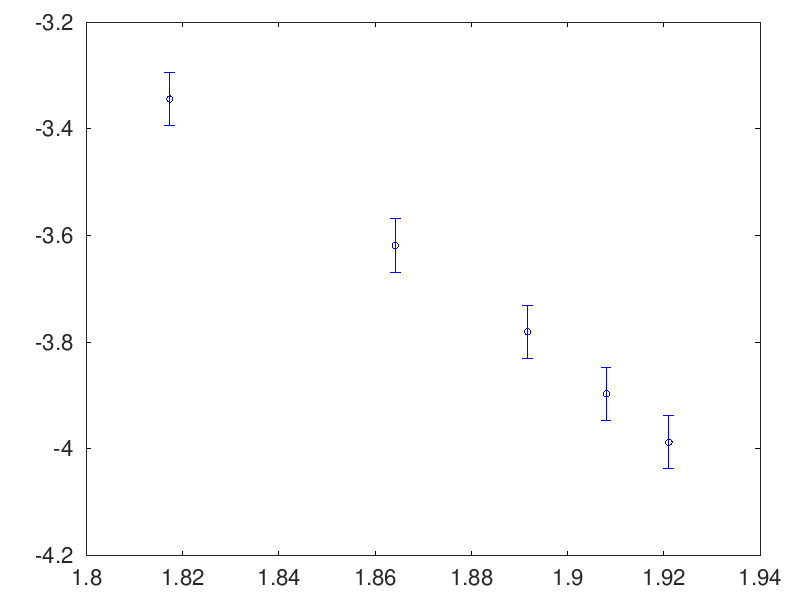

In [13]:
scale = max(w(1:n))
for i = 1:n
    eps(i) = epsilon(i) * scale;
end

display(x)
display(y)
display(eps)


X = [ x.^0 x ];                               # матрица значений переменных при beta1 и beta2
lb = [-inf -inf];                                # нижние границы beta1 и beta2
irp_temp = ir_problem(X, y, eps, lb);    # создание переменной, содержащей описание задачи 
                                              #               построения интервальной регрессии



## График интервальных измерений
figure('position',[0, 0, 800, 600]);

ir_scatter(irp_temp);
# xlim([0 22])
# ylim([-10 260])
set(gca, 'fontsize', 12)
#title('Steam generator performance');
#xlabel('Fuel consumption');
#ylabel('Steam quantity');


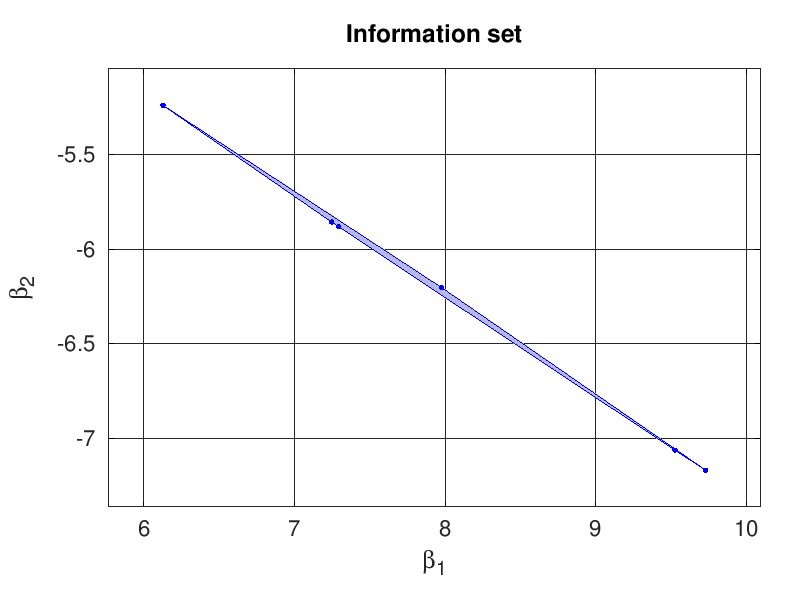

In [14]:
## Графическое представление информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
grid on
set(gca, 'fontsize', 12)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')


In [15]:
## Вершины информационного множества задачи построения интервальной регрессии
vertices = ir_beta2poly(irp_temp)

## Диаметр и наиболее удаленные вершины информационного множества 
[rhoB, b1, b2] = ir_betadiam(irp_temp)

vertices =

   7.9793  -6.2033
   6.1272  -5.2392
   7.2476  -5.8557
   7.2937  -5.8805
   9.5269  -7.0610
   9.7315  -7.1675



rhoB = 4.0877
b1 =

   9.7315  -7.1675

b2 =

   6.1272  -5.2392



In [16]:
## Внешние интервальние оценки параметров модели y = beta1 + beta2 * x 
b_int = ir_outer(irp_temp)

b_int =

   6.1272   9.7315
  -7.1675  -5.2392



In [17]:
## Точечные оценки параметров 
b_maxdiag = (b1 + b2) / 2    # как середина наибольшей диагонали информационного множества

b_gravity = mean(vertices)   # как центр тяжести информационного множества 

b_lsm = (X \ y)'             # методом наименьших квадратов

b_maxdiag =

   7.9293  -6.2033



b_gravity =

   7.9844  -6.2345



b_lsm =

   7.8565  -6.1591



ans = -6.3489


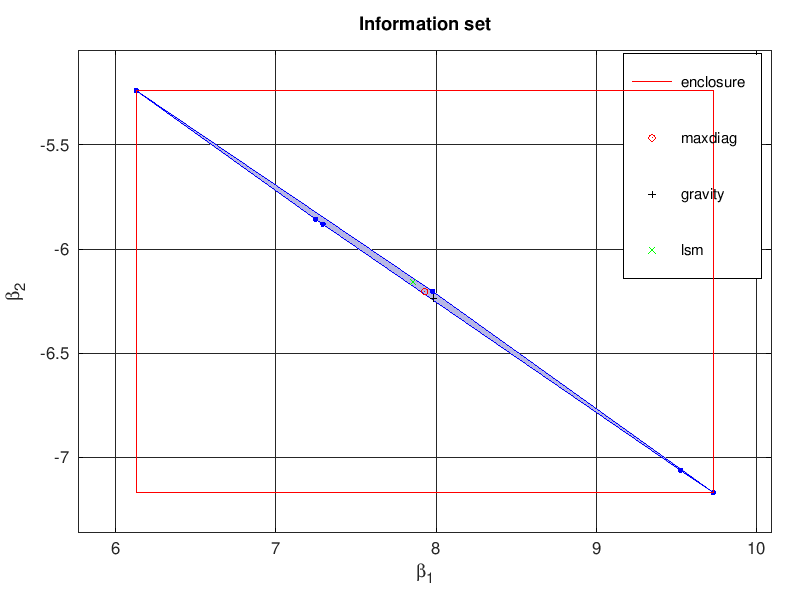

In [18]:
## Графическое представление внешней интервальной оценки информационного множества
figure('position',[0, 0, 800, 600]);
ir_plotbeta(irp_temp)
hold on
ir_plotrect(b_int,'r-')
grid on
set(gca, 'fontsize', 9)
xlabel('\beta_1')
ylabel('\beta_2')
title('Information set')

## Точечные оценки
plot(b_maxdiag(1), b_maxdiag(2), 'ro')
plot(b_gravity(1), b_gravity(2), 'k+')
plot(b_lsm(1), b_lsm(2), 'gx')
legend("", "", "enclosure", "maxdiag",  "gravity", "lsm")


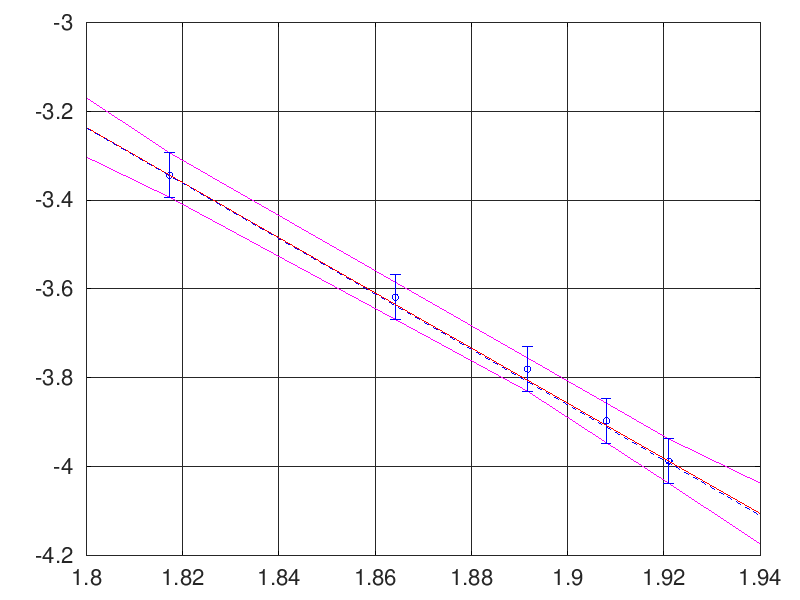

In [19]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [1.8 1.94];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

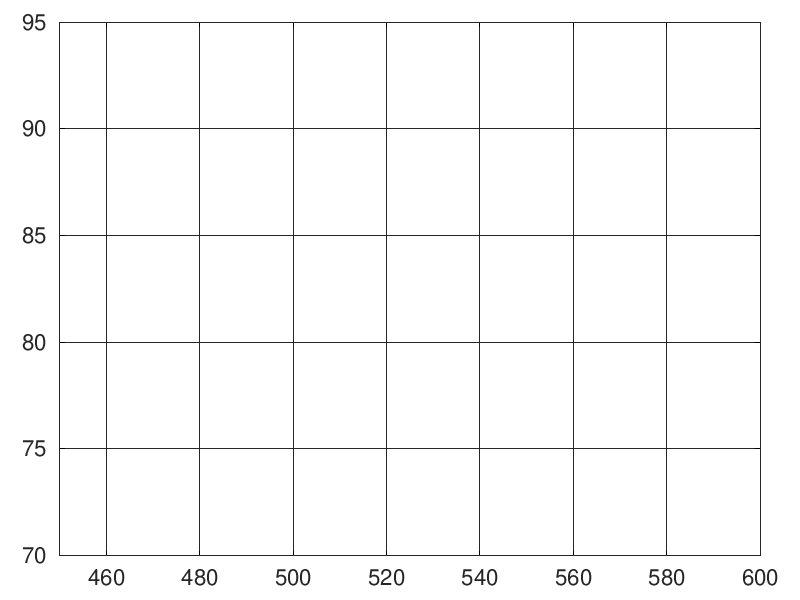

In [20]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [400 1000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
# ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)
# xlabel('Fuel consumtion')
# ylabel('Steam quantity')
# title('Set of models compatible with data and constraints')

xlim([450, 600])
ylim([70, 95])

In [29]:
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x
xp = [1.85; 1.9; 2.0; 3.0; 5.0]
Xp = [xp.^0 xp];

yp = ir_predict(irp_temp, Xp)         # интервальный прогноз значений y в точках xp
ypmid = mean(yp,2)                     # средние значения прогнозных интервалов
yprad = 0.5 * (yp(:,2) - yp(:,1))      # радиус прогнозных интервалов

yprad_relative = 100 * yprad ./ ypmid  # относительная величина неопределенности прогнозов в процентах

xp =

   1.8500
   1.9000
   2.0000
   3.0000
   5.0000



yp =

   -3.5855   -3.4968
   -3.8890   -3.8070
   -4.6035   -4.3512
  -11.7709   -9.5904
  -26.1059  -20.0688



ypmid =

   -3.5412
   -3.8480
   -4.4773
  -10.6807
  -23.0874



yprad =

   0.044320
   0.040977
   0.126128
   1.090262
   3.018531



yprad_relative =

   -1.2516
   -1.0649
   -2.8170
  -10.2078
  -13.0744



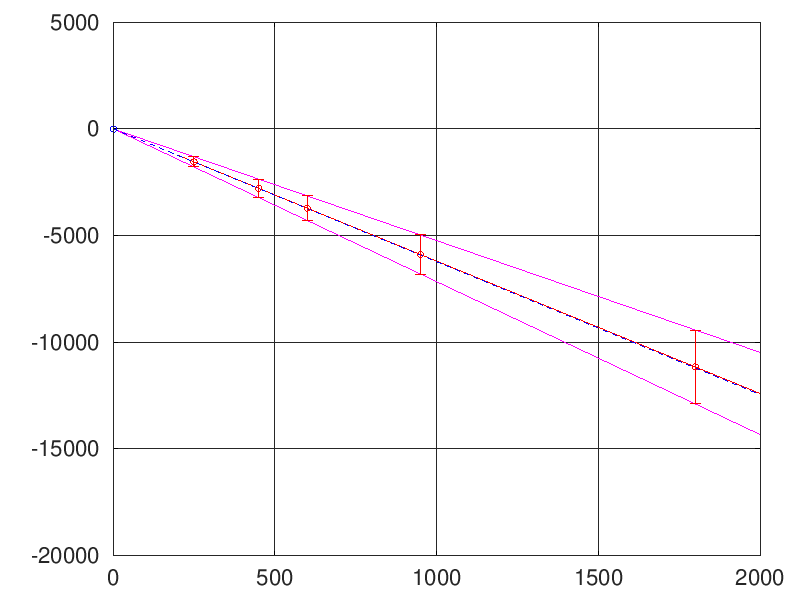

In [24]:
## Графическое представление коридора совместных зависимостей для модели y = beta1 + beta2 * x
figure('position',[0, 0, 800, 600]);
xlimits = [200 2000];
ir_plotmodelset(irp_temp, xlimits)     # коридор совместных зависимостей

hold on
ir_scatter(irp_temp,'bo')              # интервальные измерения
ir_plotline(b_maxdiag, xlimits, 'r-')   # зависимость с параметрами, оцененными как центр наибольшей диагонали ИМ
ir_plotline(b_gravity, xlim, 'b--')     # зависимость с параметрами, оцененными как центр тяжести ИМ  
# ir_plotline(b_lsm, xlim, 'b--')         # зависимость с параметрами, оцененными МНК
ir_scatter(ir_problem(Xp,ypmid,yprad),'ro')

grid on
set(gca, 'fontsize', 12)

In [25]:
# Поиск граничных точек
MY_EPS = 0.00001;
## Значения y, предсказанные с помощью модели y = beta1 + beta2 * x в точках эксперимента
irp_temp;
cur_x = irp_temp.y;
cur_eps = irp_temp.epsilon;

yp0 = ir_predict(irp_temp, X); 

for i = 1:n
x_top = cur_x(i) + cur_eps(i);
x_bot = cur_x(i) - cur_eps(i);

y_top = yp0(i, 2);
y_bot = yp0(i, 1);

if abs(y_top - x_top) < MY_EPS
    display(i)
    
end

if abs(y_bot - x_bot) < MY_EPS
    display(i)
end


end



i = 1
i = 1
i = 2
i = 3
i = 5
i = 5
